# Personal Information
Name: Jessika Mäkinen

StudentID: 14482835

Email: [**jessika.makinen@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **19.03.2023**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

CIFAR is a dataset of 60,000 images created for image recognition research. The Canadian Institute for Advanced Research (CIFAR) is a Canadian-based global research organization that adresses important questions realating from sociaty to technology. In 2009 the CIFAR datasets were published which consist of thousands of timy images from the 80 million tiny images dataset, that have been manually labelled and the creation of these datasets was funded by the Canadian Institute for Advanced Research.[1]
These images are small images of either 10 (CIFAR-10) or 100 (CIFAR-100) classes. CIFAR-10 has these 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. These classes have an even distribution of images among classes to prevent training a biased model, meaning each class has 6,000 images. The images are very small and thus have very low resolution, yet are optimal sized for image recognition research. The CIFAR-10 dataset will be used in my masters thesis to train a transformer and a convolutional neural network in image classification. 


# Data Description


Section 1 shows the shape of data, it shows how the 60,000 images are split into training and test sets and the size of each piece of data in the set.The 'X_train shape: (50000, 32, 32, 3)' represents the actual image part of one piece of data which shows that the images are 32 by 32 pixels and have 3 values per pixel representing the RGB value. The 'y_train shape: (50000, 1)' represents the lable of the data meaning each image has one label representing the class that image belongs into.

Section 2 represents what an image looks like in the dataset, a list of 32 lists that have 32 lists inside them which each host 3 numbers(the RBG numbers). In section 3 a sample image is displayed. After viewing different images from different classes it is evident that the images vary a lot, for example the 'airplane' class has images of different types of airplanes, including commercial airliners to fighter jets. and the birds class has images of various bird species, such as eagles, ducks, and owls.
from the truck class is displayed.

As stated in the CIFAR-10 documentation, each class has an equal number of images, with 6,000 images per class. This means that the dataset is balanced, which is important for training machine learning models. this is represented by the graph at section 'Analysis 4'. 


At section 'Analysis 5' I explored the avrage colour per class. Here the average colour per image was retrieved and the average of all the images of one class is displayed as a colour. The results here start to display some interesting insights. This average colour per class shows that 'ship' and 'airplane' are blue and this is likely because these objects belong either in the sky or in water which clearly comes through as the representative colour for these images. The same goes for 'truck' and 'automobile' which mainly belong on the asphalt leading to gray images, however these objects are also not creations of nature as the other folowing classes are, potentially also leading to the image being less natural toned. The final classes are animals and the animals have very natural tones.

At section 'Analysis 6' I explored the scatteredness/distribution of the average colours of the images of each class in relation to the classes average colour. Three graphs are displayed first with the scatter 

In the 'Analysis 7' section the lightness of the images in each class was explored. 'airplane' is the lightest class, this could be due to images being taken of planes while they are in the air and daytime pictures of the sky tend to be very light. 'frog' is the darkest class, likely due to frogs being most active at night causing many images to be taken in the dark[2].

Finally in the 'Analysis 8' section a t-distributed stochastic neighbor embedding (t-SNE) was preformed. t-SNE is a dimensionality reduction algorithm that can be used to visualize high-dimensional data in two or three dimensions. The t-SNE was used to visualize the CIFAR-10 dataset in two dimensions to see whether there are any clusters or patterns in the data. The results of the t-SNE represent that there is some pattern, the yellow and green nodes('ship' and 'truck') are mostly situated in the lower right of the plot and there is a stonger cluster of purple('airplane') at the top right. The middle values ('bird', 'cat', 'deer', 'dog', 'frog' and 'horse') appear over a large area, albeit moslty in the top left area and there seems to be a clear cut of line between the 'ship' and 'truck' classes compared to the animals classes.




<!-- ![image](example.png) -->

references:
[1]https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
[2]https://www.rspb.org.uk/birds-and-wildlife/wildlife-guides/other-garden-wildlife/amphibians-and-reptiles/common-frog/#:~:text=Common%20frogs%20are%20most%20active,as%20well%20as%20their%20lungs.

In [48]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import colorsys



### Data Loading

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [50]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [51]:
# Check shape of data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Analysis 2: 

In [76]:
# ...
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

### Analysis 3:

truck


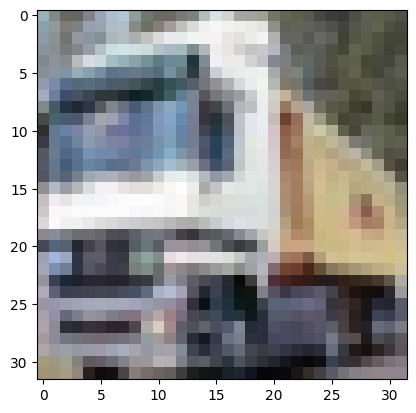

In [53]:
# ...
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
idx = 1
plt.imshow(X_train[idx,0:])
print(labels[y_train[idx][0]])

### Analysis 4:

distribution of classes

Text(0.5, 1.0, 'Class distribution in training set')

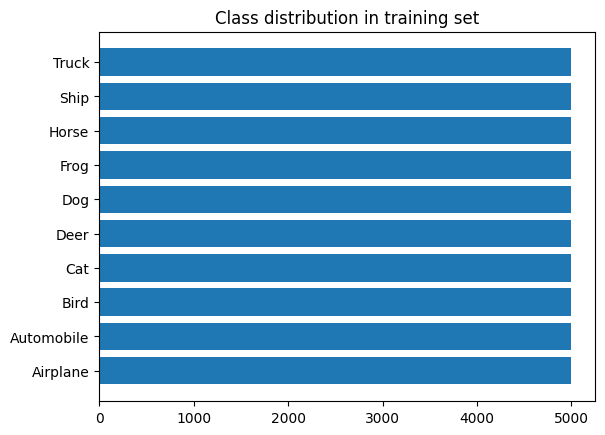

In [54]:
# training set
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

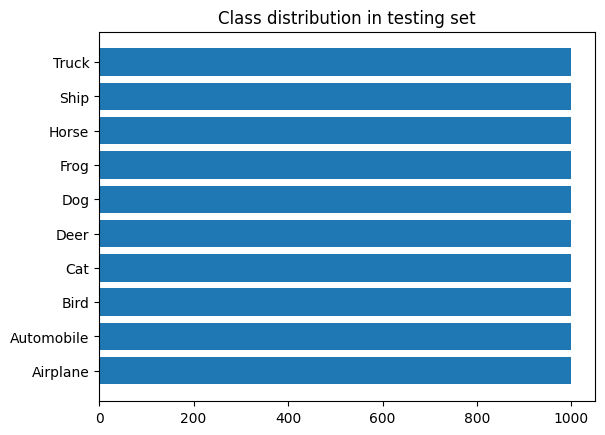

In [55]:
# test set 
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

### Analysis 5:

AVERAGE COLOR PER CLASS

In [56]:
def get_average_color(image):
    r_mean = np.mean(image[:, :, 0])
    g_mean = np.mean(image[:, :, 1])
    b_mean = np.mean(image[:, :, 2])

    return (r_mean, g_mean, b_mean)

In [57]:
average_colors = {i: [] for i in range(10)}

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i][0]

    average_color = get_average_color(image)

    average_colors[label].append(average_color)

In [58]:
for label, colors in average_colors.items():
    class_average_color = np.mean(colors, axis=0)
    print("Class {}: {}".format(label, class_average_color))

Class 0: [134.04212949 142.88398828 150.17123652]
Class 1: [120.1519543  115.90500156 114.03565449]
Class 2: [124.75872813 125.32664199 108.13141934]
Class 3: [126.34802988 116.38508867 105.96235215]
Class 4: [120.25561172 118.62746152  96.44282363]
Class 5: [127.48110293 118.48237324 106.21924297]
Class 6: [119.86455039 111.7903875   88.03086348]
Class 7: [127.99938184 122.36528086 106.30592988]
Class 8: [125.00761094 133.97562773 141.44483945]
Class 9: [127.16008086 123.76209004 121.90946992]


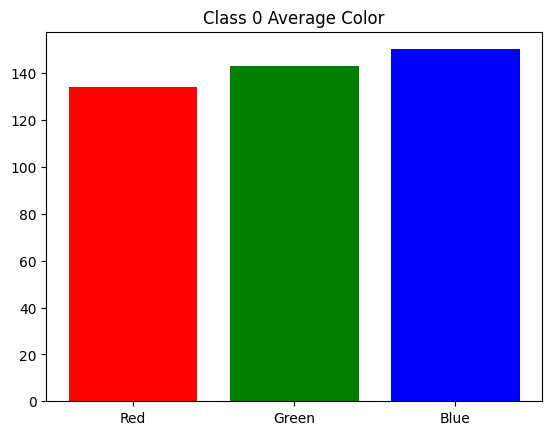

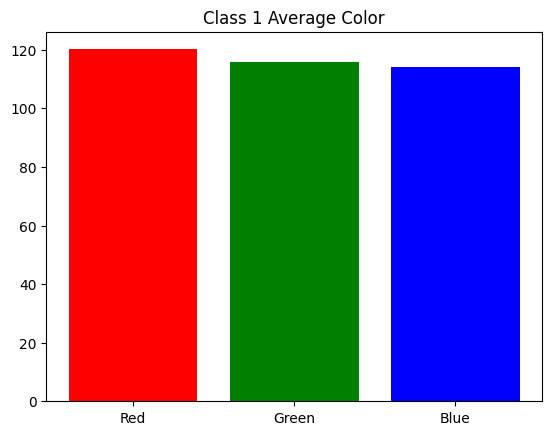

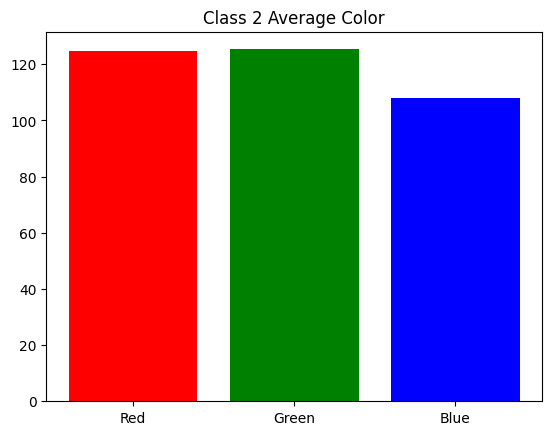

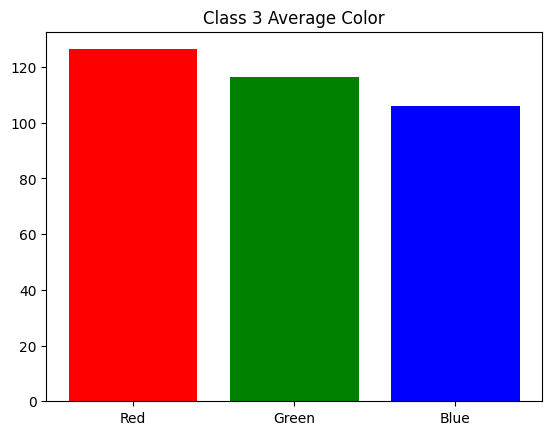

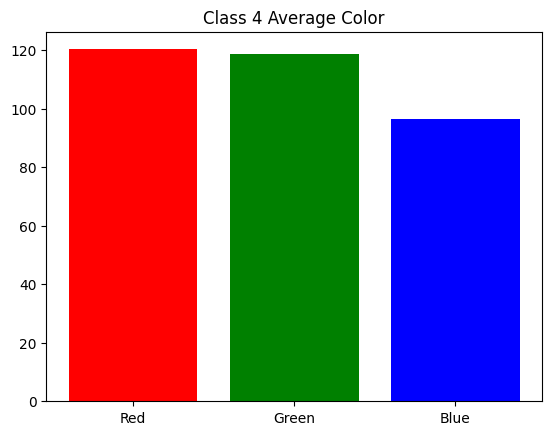

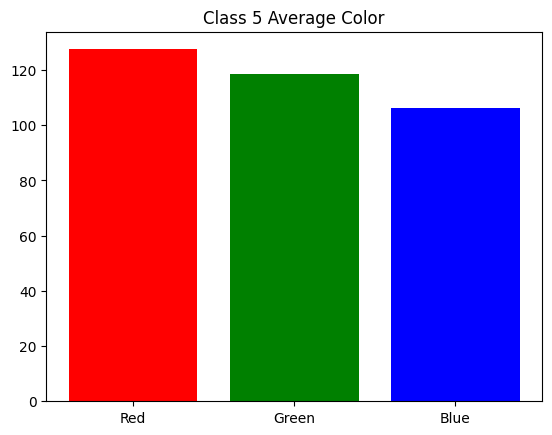

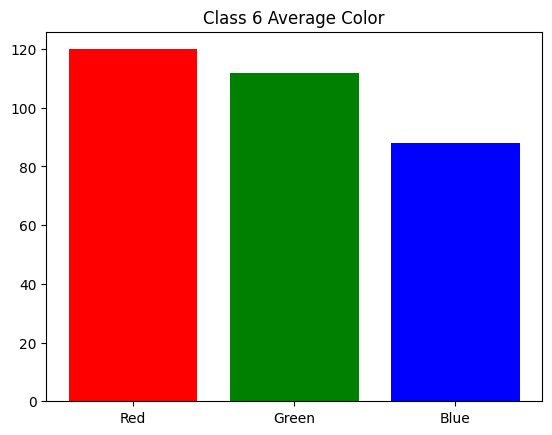

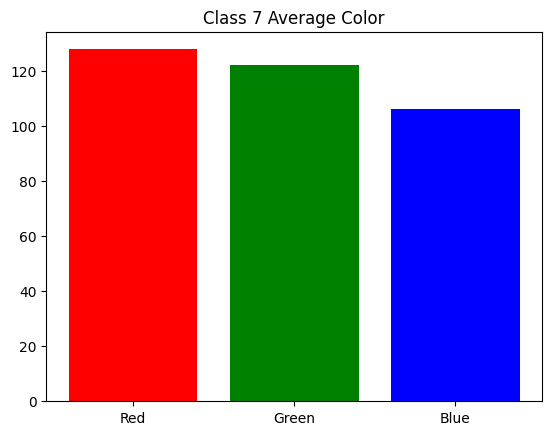

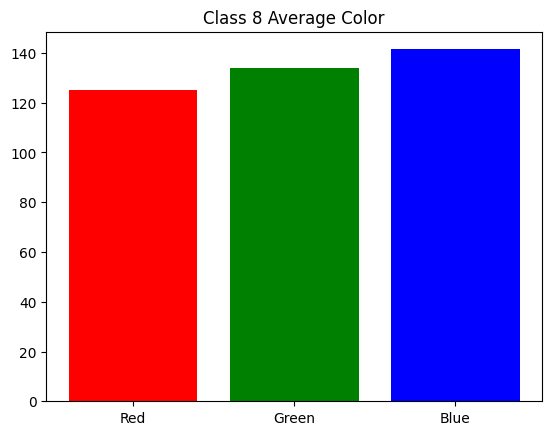

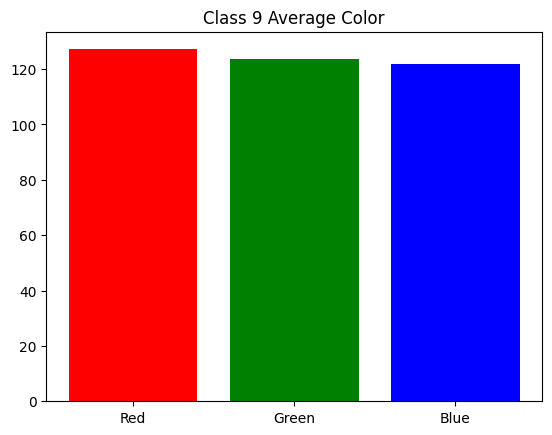

In [59]:
def plot_colors(average_colors):
    color_labels = ["Red", "Green", "Blue"]
    color_indices = [0, 1, 2]

    for label, colors in average_colors.items():
        class_average_color = np.mean(colors, axis=0)

        plt.bar(color_indices, class_average_color, color=color_labels)
        plt.xticks(color_indices, color_labels)
        plt.title("Class {} Average Color".format(label))
        plt.show()

average_colors = {i: [] for i in range(10)}

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i][0]

    average_color = get_average_color(image)
    average_colors[label].append(average_color)

plot_colors(average_colors)

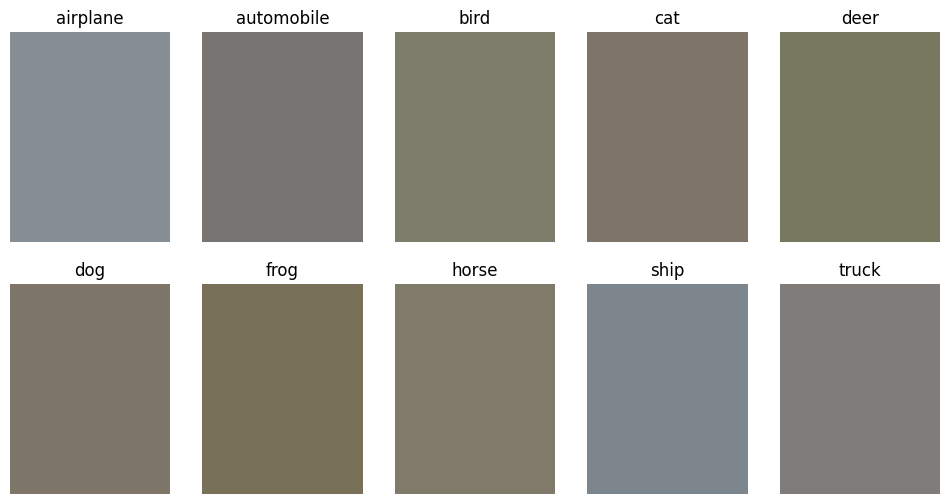

In [60]:
def plot_colors(average_colors):
    color_labels = ["Red", "Green", "Blue"]
    color_indices = [0, 1, 2]

    class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                    "dog", "frog", "horse", "ship", "truck"]
    class_indices = range(10)
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    axs = axs.flatten()

    for i, (label, colors) in enumerate(average_colors.items()):
        class_average_color = np.mean(colors, axis=0)

        rect = Rectangle((0, 0), 1, 1, facecolor=class_average_color/255, edgecolor='none')

        axs[i].add_patch(rect)
        axs[i].axis('off')
        axs[i].set_title(class_labels[label])
    plt.show()

average_colors = {i: [] for i in range(10)}

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i][0]
    average_color = get_average_color(image)
    average_colors[label].append(average_color)

plot_colors(average_colors)


### Analysis 6:

SCATTER

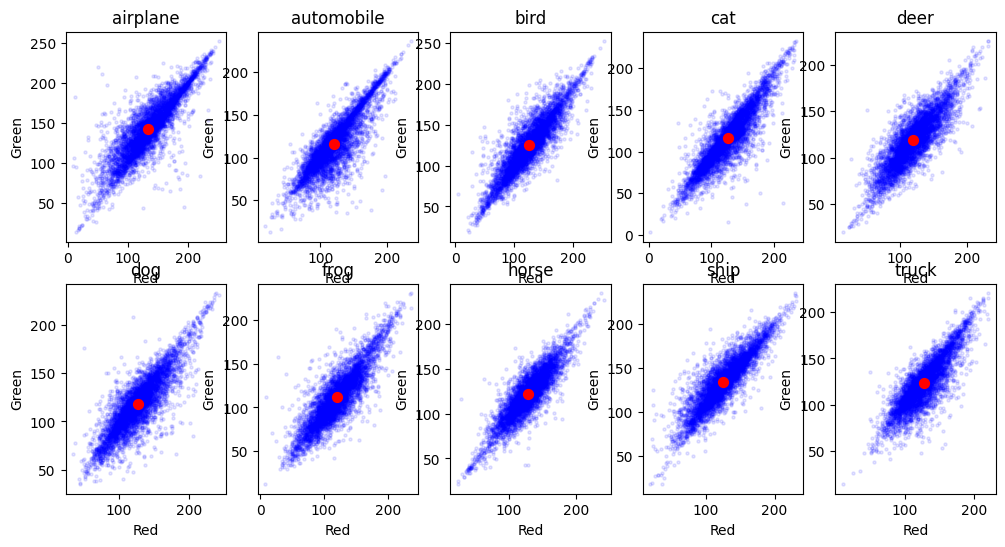

In [61]:
def plot_colors1(average_colors, no1, no2):
    color_labels = ["Red", "Green", "Blue"]
    color_indices = [0, 1, 2]

    class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                    "dog", "frog", "horse", "ship", "truck"]
    class_indices = range(10)

    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    axs = axs.flatten()

    for i, (label, colors) in enumerate(average_colors.items()):
        class_name = class_labels[label]
        image_colors = np.array(colors)
        axs[i].scatter(image_colors[:, 0], image_colors[:, 1], s=5, c='b', alpha=0.1)
        class_average_color = np.mean(colors, axis=0)
        axs[i].scatter(class_average_color[0], class_average_color[1], s=50, c='r')

        axs[i].set_title(class_name)
        axs[i].set_xlabel(color_labels[no1])
        axs[i].set_ylabel(color_labels[no2])

    plt.show()

average_colors = {i: [] for i in range(10)}

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i][0]
    average_color = get_average_color(image)
    average_colors[label].append(average_color)

plot_colors1(average_colors, 0, 1)


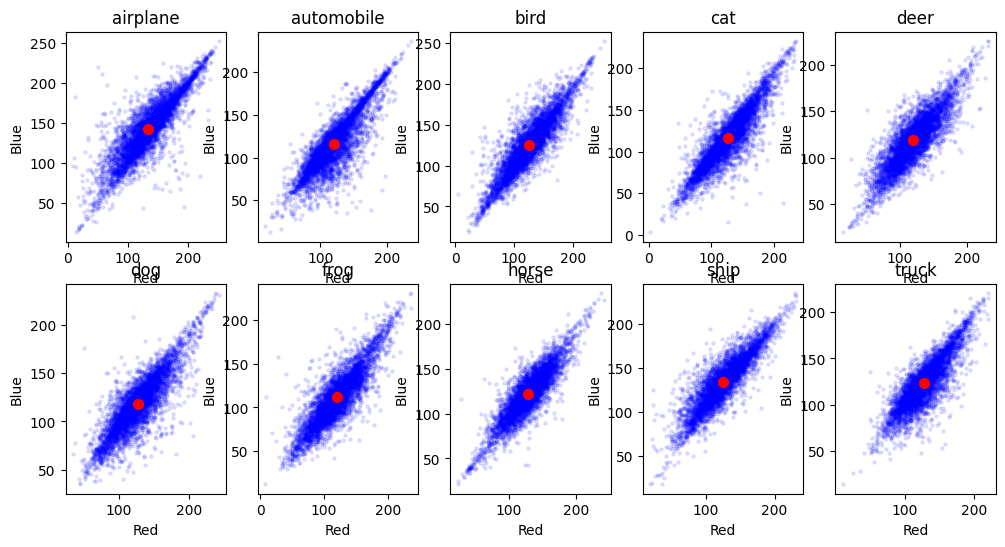

In [62]:
plot_colors1(average_colors, 0, 2)


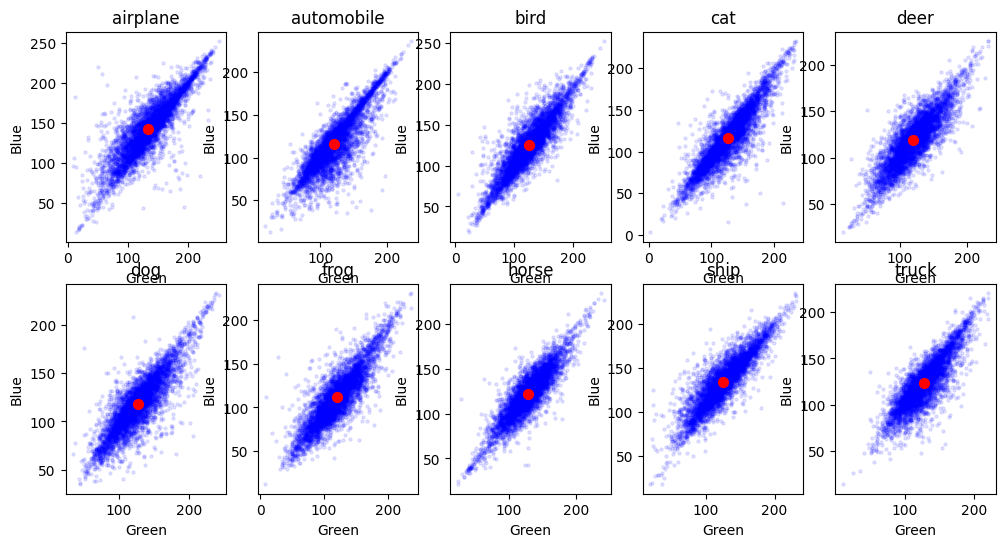

In [63]:
plot_colors1(average_colors, 1, 2)


### Analysis 7:

LIGHTNESS

In [71]:
def get_average_lightness(image):
    h, l, s = colorsys.rgb_to_hls(image[0], image[1], image[2])
    return l

def plot_colors1(average_lightnesses):

    class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                    "dog", "frog", "horse", "ship", "truck"]

    for i, (label, colors) in enumerate(average_colors.items()):
        # Get the class name
        class_name = class_labels[label]
        avg_lightness = round(average_lightnesses[label], 2)
        print(f"Average lightness for {class_name}: {avg_lightness}")

    plt.show()

average_lightnesses = {i: [] for i in range(10)}

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i][0]
    average_color = get_average_color(image)
    average_lightness = get_average_lightness(average_color)
    average_colors[label].append(average_color)
    average_lightnesses[label].append(average_lightness)

for label, lightnesses in average_lightnesses.items():
    average_lightness = np.mean(lightnesses)
    average_lightnesses[label] = average_lightness

plot_colors1(average_lightnesses)



Average lightness for airplane: 142.37
Average lightness for automobile: 117.12
Average lightness for bird: 117.98
Average lightness for cat: 116.33
Average lightness for deer: 110.28
Average lightness for dog: 117.4
Average lightness for frog: 105.14
Average lightness for horse: 118.01
Average lightness for ship: 133.36
Average lightness for truck: 124.54


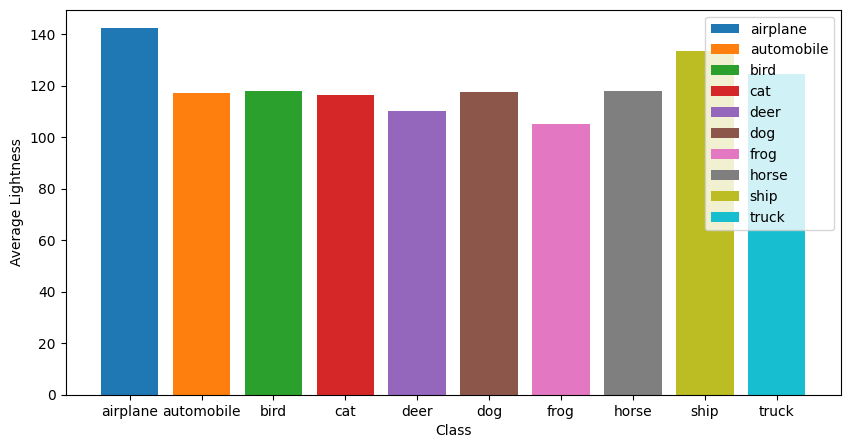

In [73]:

fig, ax = plt.subplots(figsize=(10, 5))
for i, avg_lightness in enumerate(average_lightnesses.values()):
    class_name = class_labels[i]
    ax.bar(class_name, avg_lightness, label=class_name)

ax.set_ylabel('Average Lightness')
ax.set_xlabel('Class')
ax.legend()



### Analysis 8:

t-SNE

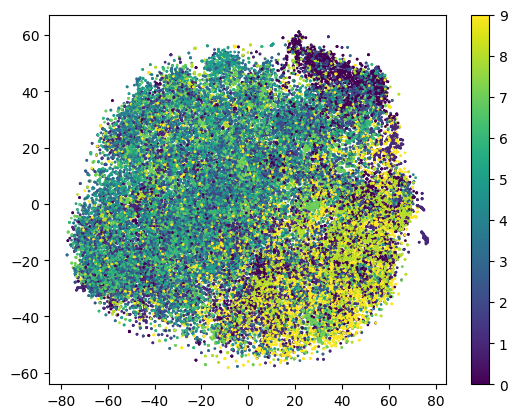

In [79]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train.astype('float32') / 255.0

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train.squeeze(), s=1)
plt.colorbar()
plt.show()